# Yasaman Shojaei Project

### Part 1. Heart Disease Detection (Classification)

#### step 1. prepare dataset

In [1]:
import pandas as pd


In [2]:
raw_data_path = r"raw_dataset\Heart.csv"

df = pd.read_csv(raw_data_path)
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### step 2. handle missing values

In [3]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing data. So there is no need to handle missing data.

#### step 3. visualize heatmap

In [4]:
import seaborn as sns


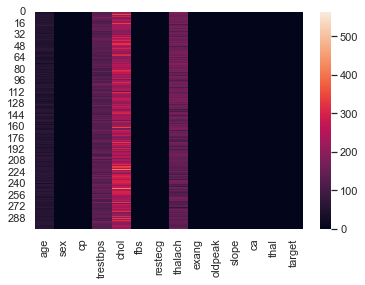

In [5]:
sns.set_theme()
ax = sns.heatmap(df)


because data values are not normalized, comparing and interpreting the above figure is impossible; we lose data for interpretation, wherever we select feature boundaries.

#### step 4. select features

In [6]:
y = df["target"]
x = df.drop("target", axis=1)
x.shape, y.shape


((303, 13), (303,))

#### step 5. standardize input features

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
# using z-score method
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)
x_standard


array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

#### step 6. split dataset into train and test datasets


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=test_size,
    random_state=42,
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((272, 13), (31, 13), (272,), (31,))

#### step 7. implement KNN with sklearn

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [12]:
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

training_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)

scores = [training_score, test_score]
print(scores)
f"Accuracy of the model at {k} is {accuracy_score(y_test, y_pred)}"


[0.7647058823529411, 0.7096774193548387]


'Accuracy of the model at 3 is 0.7096774193548387'

we don't know that this is the best k for highest test and train score. so we need to do a fine-tuning on k.

#### step 8. fine-tune k

In [13]:
import numpy as np
import matplotlib.pyplot as plt


Minimum error:- 0.16129032258064516 at k = 52


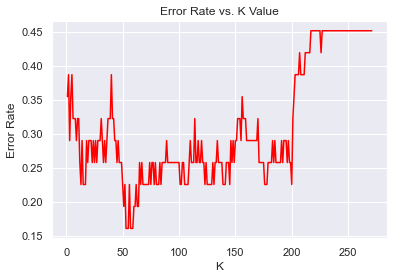

In [14]:
error_rate = []
k_range = 272
for i in range(1, k_range):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, k_range), error_rate, color="red")
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
print("Minimum error:-", min(error_rate), "at k =", error_rate.index(min(error_rate)))


Maximum accuracy:- 0.8387096774193549 at K = 52


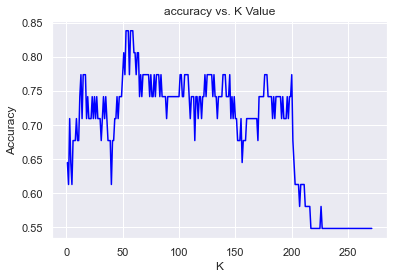

In [15]:
acc = []
k_range = 272

for i in range(1, k_range):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    acc.append(accuracy_score(y_test, yhat))

plt.figure()
plt.plot(range(1, k_range), acc, color="blue")
plt.title("accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
print("Maximum accuracy:-", max(acc), "at K =", acc.index(max(acc)))


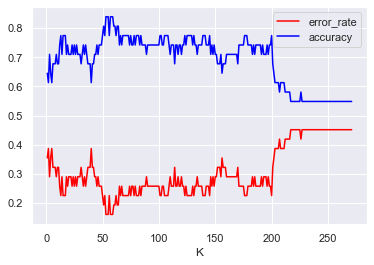

In [16]:
plt.plot(range(1, k_range), error_rate, color="red")
plt.plot(range(1, k_range), acc, color="blue")
plt.xlabel("K")
plt.legend(["error_rate", "accuracy"])


so best k is 52


#### step 9. confusion matrix, precision, recall, f1-score


In [17]:
best_k = 52
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)
accuracy_score(y_test, y_prediction)


0.7741935483870968

##### 9.1 confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[12,  2],
       [ 7, 10]], dtype=int64)

<AxesSubplot:>

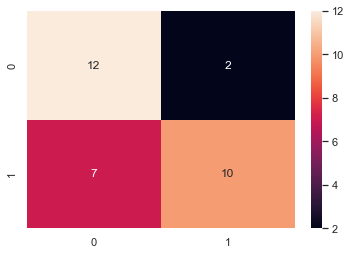

In [20]:
sns.heatmap(conf_matrix, annot=True)


<AxesSubplot:>

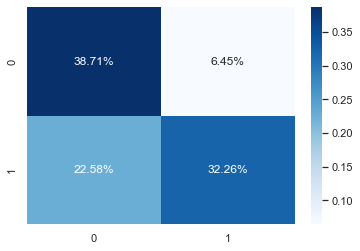

In [21]:
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt=".2%", cmap="Blues")


<AxesSubplot:>

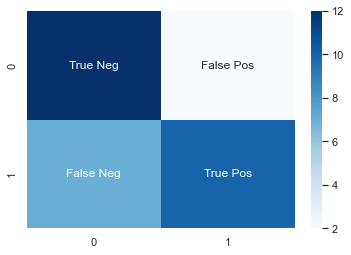

In [22]:
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues")


##### 9.2 precision, recall, fscore

In [23]:
from sklearn.metrics import precision_recall_fscore_support


In [24]:
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_test, y_pred, average="macro"
)
precision, recall, fbeta_score, support


(0.7324561403508771, 0.7226890756302521, 0.7084639498432602, None)